In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Auto=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Auto.csv')

In [3]:
rows_select = Auto.horsepower.apply(lambda x: x.isnumeric())
Auto= Auto.loc[rows_select, :]
Auto.horsepower = np.float64(Auto.horsepower)    
Auto.index = range(1, len(Auto)+1)
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 1 to 392
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 27.7+ KB


In [4]:
Auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
388,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
389,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
390,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
391,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
392,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [5]:
#train_test_split

from sklearn.model_selection import train_test_split, LeaveOneOut
X=Auto.horsepower.values.reshape(-1,1)
y=Auto.mpg
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

from sklearn import metrics
print ("The MAE is: {:.3}".format( metrics.mean_absolute_error(y_test, y_pred)))
print ("The MSE is: {:.3}".format( metrics.mean_squared_error(y_test, y_pred)))
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(y_test, y_pred))))

The MAE is: 3.9
The MSE is: 24.8
The RMSE is: 4.98


In [7]:
X_poly = pd.concat([Auto.horsepower, np.power(Auto.horsepower, 2), np.power(Auto.horsepower, 3)], axis=1)
X_poly.columns = ['horsepower', 'hp_squared', 'hp_cubed']
X_poly.head()

,horsepower,hp_squared,hp_cubed
1,130.0,16900.0,2197000.0
2,165.0,27225.0,4492125.0
3,150.0,22500.0,3375000.0
4,150.0,22500.0,3375000.0
5,140.0,19600.0,2744000.0


In [8]:
# Quadratic Regression
X_2 = X_poly.loc[:, ['horsepower', 'hp_squared']]
y = Auto.mpg
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.5, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print ("The MAE is: {:.4}".format( metrics.mean_absolute_error(y_test, y_pred) )  )  # (True, Predict) 순서  
print ("The MSE is: {:.4}".format( metrics.mean_squared_error(y_test, y_pred) )  )
print ("The RMSE is: {:.4}".format( np.sqrt( metrics.mean_squared_error(y_test, y_pred))))

The MAE is: 3.244
The MSE is: 18.85
The RMSE is: 4.341


In [9]:
# Cubic regression
X_3 = X_poly.loc[:, ['horsepower', 'hp_squared', 'hp_cubed']]
y = Auto.mpg
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.5, random_state=1)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print ("The MAE is: {:.4}".format( metrics.mean_absolute_error(y_test, y_pred) )  )  # (True, Predict) 순서  
print ("The MSE is: {:.4}".format( metrics.mean_squared_error(y_test, y_pred) )  )
print ("The RMSE is: {:.4}".format( np.sqrt( metrics.mean_squared_error(y_test, y_pred))))

The MAE is: 3.245
The MSE is: 18.81
The RMSE is: 4.336


In [10]:
for randomstate in [1,5,1234]:
    print('\nrandom_seed=%d' % randomstate)
    for features in [1,2,3]:
        X=X_poly.iloc[:,:features]
        print(X.columns,end=':')
        y=Auto.mpg
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=randomstate)
        lr_model=LinearRegression()
        lr_model.fit(X_train,y_train)
        y_pred=lr_model.predict(X_test)
        print('The MSE is {:.4}'.format(metrics.mean_squared_error(y_test,y_pred)))


random_seed=1
Index(['horsepower'], dtype='object'):The MSE is 24.8
Index(['horsepower', 'hp_squared'], dtype='object'):The MSE is 18.85
Index(['horsepower', 'hp_squared', 'hp_cubed'], dtype='object'):The MSE is 18.81

random_seed=5
Index(['horsepower'], dtype='object'):The MSE is 29.59
Index(['horsepower', 'hp_squared'], dtype='object'):The MSE is 24.15
Index(['horsepower', 'hp_squared', 'hp_cubed'], dtype='object'):The MSE is 24.1

random_seed=1234
Index(['horsepower'], dtype='object'):The MSE is 27.11
Index(['horsepower', 'hp_squared'], dtype='object'):The MSE is 20.87
Index(['horsepower', 'hp_squared', 'hp_cubed'], dtype='object'):The MSE is 20.9


In [11]:
from sklearn.model_selection import KFold, cross_val_score

#X_poly : Feature Matrix, y=response vecctor
kf=KFold(n_splits=10,shuffle=False,random_state=1)
MSE_s=list()

for train, test in kf.split(X_poly):
    X_train = X_poly.iloc[train, :]
    y_train = Auto.mpg.iloc[train]
    X_test = X_poly.iloc[test, :]
    y_test = Auto.mpg.iloc[test]
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    MSE_s.append( metrics.mean_squared_error(y_test, y_pred))
    
print("10-Fold CV MSE = %.4f" % (np.array(MSE_s).mean()))

10-Fold CV MSE = 21.3366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [12]:
lm=LinearRegression()
scores=cross_val_score(lm,X_poly,y,cv=10,scoring='neg_mean_squared_error')
mse_scores=-scores
print(mse_scores)
print('10-Fold CV MSE = %.4f'%(np.array(mse_scores).mean()))

[12.56821522 16.72742348 19.97659557 21.51654569 13.88689296 10.32004012
 11.81509234 20.58935444 49.97092377 35.99497823]
10-Fold CV MSE = 21.3366


In [13]:
# If you need to shuffle : X와 y의 random sample을 취함 (all samples, no replacement). random_states have to be the same
scores = cross_val_score(lm, X_poly.sample(frac=1, random_state=17), 
                         y.sample(frac=1, random_state=17), cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)
print("10-Fold CV MSE = %.4f" % (np.array(mse_scores).mean()))

[18.55672195 16.48831466 22.37206719 24.74472029 12.07171089 33.78773319
 11.90700848 23.96762937 16.03916995 11.61739629]
10-Fold CV MSE = 19.1552


In [14]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


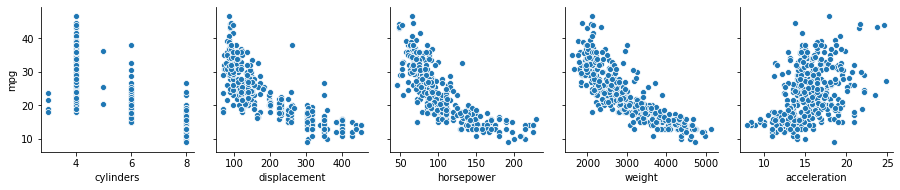

In [15]:
sns.pairplot(data=Auto,
            x_vars=['cylinders','displacement','horsepower',
                   'weight','acceleration'],
            y_vars=['mpg'])

[28.80347628205128, 22.611229807692308, 22.60933126780626, 21.470917708333335, 20.811982615384615, 20.367053027065527, 20.128171755625328, 20.041370252403844, 19.819893819246595, 19.394037391025638, 19.665185473617292, 19.563558159722223, 19.534176505841298, 19.876876403061225, 19.782276683760685, 19.66165796023638, 19.750322194126518, 19.972799835786642, 20.137255788763408, 20.309922937499998, 20.233491753881044, 20.18286477670057, 20.24482632203965, 20.144384929220085, 20.172909699487178, 20.189357255158548, 20.29064475836235, 20.211118291306907, 20.13695511143633, 20.159061073361823, 20.039118865898235, 20.01849016363682, 19.973645135504224, 19.9423782971786, 19.900149684981688, 19.797433732490504, 19.78192594397932, 19.72486784927907, 19.761354710126604, 19.704481494391025]

min error K = 10


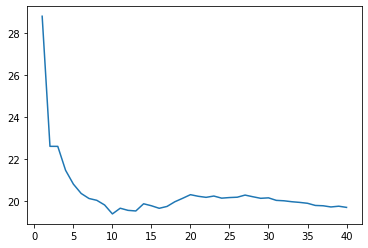

In [16]:
from sklearn.neighbors import KNeighborsRegressor
scores=[]
X=Auto.loc[:,'cylinders':'acceleration']
y=Auto.mpg
for k in range(1,41):
    knn=KNeighborsRegressor(n_neighbors=k)
    mse_s=-cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    scores.append(mse_s.mean())
    
print(scores)

plt.plot(range(1,41),scores)
print('\nmin error K = %d' % (np.argmin(scores)+1))
# K=10일 때가 MSE 가장 작으므로 K=10으로 parameter 정하는 것이 타당

In [17]:
Caravan=pd.read_csv('C:/Users/Hyeondo/OneDrive - 연세대학교 (Yonsei University)/data/data_1/Caravan.csv',
                   index_col=0)
Caravan=pd.get_dummies(Caravan,drop_first=True)

X=Caravan.drop(['Purchase_Yes'],axis=1)
y=Caravan.Purchase_Yes

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='newton-cg')
cross_val_score(log_reg,X,y,cv=7,scoring='roc_auc').mean()

0.7408466367913625

In [19]:
print('exit 0')

exit 0
